# 벡터 정의 일반화하기

In [ ]:
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/ch06/matrices.py" -O "matrices.py"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/ch06/vectors.py" -O "vectors.py"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/ch06/inside.JPG" -O "inside.JPG"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/ch06/outside.JPG" -O "outside.JPG"


## 2차원 벡터의 클래스

In [1]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

In [2]:
v = Vec2(3,4) # <1>
w = v.add(Vec2(-2,6)) # <2>
print(w.x) # <3>

1


In [3]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y

## Vec2 class 개선

In [4]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar): #1
        return self.scale(scalar)

In [5]:
# nice syntax
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

In [6]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar): #1
        return self.scale(scalar)
    def __repr__(self):
        return "Vec2({},{})".format(self.x,self.y)

In [7]:
# nice repr
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

Vec2(3.0,4.0)

## 3차원 벡터 클래스도 만들기

In [8]:
class Vec3():
    def __init__(self,x,y,z): #1
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __add__(self, other):
        return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar):
        return self.scale(scalar)
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x,self.y, self.z)

In [9]:
2.0 * (Vec3(1,0,0) + Vec3(0,1,0))

Vec3(2.0,2.0,0.0)

In [10]:
def average(v1,v2):
    return 0.5 * v1 + 0.5 * v2

In [11]:
average(Vec2(9.0, 1.0), Vec2(8.0,6.0))

Vec2(8.5,3.5)

In [12]:
average(Vec3(1,2,3), Vec3(4,5,6))

Vec3(2.5,3.5,4.5)

## Vector 기반 클래스 만들기

In [13]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass

In [ ]:
## 작동하지 않는다.
# v = Vector()

In [15]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)

In [16]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [ ]:
# 빼기 메소드 제공
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [18]:
Vec2(1,3) - Vec2(5,1)

Vec2(-4,2)

## 벡터 공간인지 테스트하기

In [19]:
s = -3
u, v = Vec2(42,-10), Vec2(1.5, 8)
s * (u + v) == s * v + s * u

True

In [20]:
from random import uniform

def random_scalar():
    return uniform(-10,10)

def random_vec2():
    return Vec2(random_scalar(),random_scalar())

a = random_scalar()
u, v = random_vec2(), random_vec2()
## below assertion will probably fail
# assert a * (u + v) == a * v + a * u

In [21]:
from math import isclose

def approx_equal_vec2(v,w):
    return isclose(v.x,w.x) and isclose(v.y,w.y) #1

for _ in range(0,100): #2
    a = random_scalar()
    u, v = random_vec2(), random_vec2()
    assert approx_equal_vec2(a * (u + v), a * v + a * u) #3

In [22]:
def test(eq, a, b, u, v, w): #<1>
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

In [23]:
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(approx_equal_vec2, a,b,u,v,w)

## Exercises

**EXERCISE:** `Vector` 클래스를 상속받는 `Vec3` 클래스를 작성해라.

In [ ]:
class Vec3(Vector):
    ?

**EXERCISE:** 동등메서드(__eq__)는 웃기게도 `Vec2(1,2) == Vec3(1,2,3)` 를 `True`로 판단한다. 파이썬은 타입을 강하게 따지지 않는다. 클래스가 서로 맞아야지 동등비교가 되도록 바꿔라. (`__class__` 를 이용해라.)

In [ ]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        ?
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

**EXERCISE:** 벡터를 스칼라로 나눌 수 있는 `__truediv__` 함수를 구현해라.

In [ ]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod    #1
    @abstractproperty #2
    def zero():
        pass
    def __neg__(self): #3
        return self.scale(-1)
    def __truediv__(self, scalar):
        return ?

In [ ]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [ ]:
Vec2(1,2)/2

Vec2(0.5,1.0)

# 다른 벡터공간 탐색하기

## 다른 차원의 벡터 보기

In [ ]:
class Vec1(Vector):
    def __init__(self,x):
        self.x = x
    def add(self,other):
        return Vec1(self.x + other.x)
    def scale(self,scalar):
        return Vec1(scalar * self.x)
    @classmethod
    def zero(cls):
        return Vec1(0)
    def __eq__(self,other):
        return self.x == other.x
    def __repr__(self):
        return "Vec1({})".format(self.x)

In [ ]:
Vec1(2) + Vec1(2)

Vec1(4)

In [ ]:
3 * Vec1(1)

Vec1(3)

In [ ]:
class Vec0(Vector):
    def __init__(self):
        pass
    def add(self,other):
        return Vec0()
    def scale(self,scalar):
        return Vec0()
    @classmethod
    def zero(cls):
        return Vec0()
    def __eq__(self,other):
        return self.__class__ == other.__class__ == Vec0
    def __repr__(self):
        return "Vec0()"

In [ ]:
- 3.14 * Vec0()

Vec0()

In [ ]:
Vec0() + Vec0() + Vec0() + Vec0()

Vec0()

## 이미지를 벡터로 다루기

In [ ]:
from PIL import Image
class ImageVector(Vector):
    size = (300,300) #1
    def __init__(self,input):
        try:
            img = Image.open(input).resize(ImageVector.size) #2
            self.pixels = img.getdata()
        except:
            self.pixels = input #3
    def image(self):
        img = Image.new('RGB', ImageVector.size) #4
        img.putdata([(int(r), int(g), int(b)) 
                     for (r,g,b) in self.pixels])
        return img
    def add(self,img2): #5
        return ImageVector([(r1+r2,g1+g2,b1+b2) 
                            for ((r1,g1,b1),(r2,g2,b2)) 
                            in zip(self.pixels,img2.pixels)])
    def scale(self,scalar): #6
        return ImageVector([(scalar*r,scalar*g,scalar*b) 
                      for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls): #7
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0,total_pixels)])
    def _repr_png_(self): #8
        return self.image()._repr_png_()

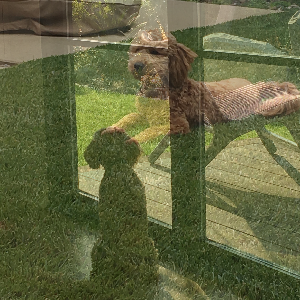

In [ ]:
0.5 * ImageVector("inside.JPG") + 0.5 * ImageVector("outside.JPG")

In [ ]:
white = ImageVector([(255,255,255) for _ in range(0,300*300)])

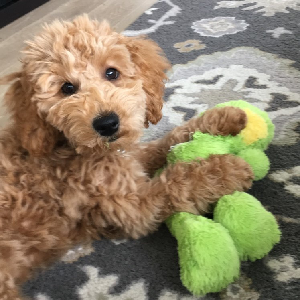

In [ ]:
ImageVector("melba_toy.JPG")

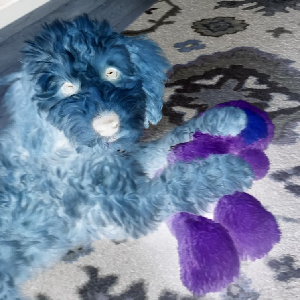

In [ ]:
white - ImageVector("melba_toy.JPG")

## Exercies

**MINI-PROJECT:** 다음은 `Vector` 를 상속받은 `Matrix` 클래스를 만든 것이다. rows와 columns에 자신의 행과 열의 개수를 명시함으로써 새로운 클래스를 작성할 수 있다. 이를 이용하여 `Matrix5_by_3`(행 5개, 열 3개) 와 `Matrix2_by_2`(행 2개, 열 2개) 클래스를 작성하여라.

In [ ]:
class Matrix(Vector):
    @abstractproperty
    def rows(self):
        pass
    @abstractproperty
    def columns(self):
        pass
    def __init__(self,entries):
        self.entries = entries
    def add(self,other):
        return self.__class__(
            tuple(
                tuple(self.entries[i][j] + other.entries[i][j]
                        for j in range(0,self.columns()))
                for i in range(0,self.rows())))
    def scale(self,scalar):
        return self.__class__(
            tuple(
                tuple(scalar * e for e in row) 
                for row in self.entries))
    def __repr__(self):
        return "%s%r" % (self.__class__.__qualname__, self.entries)
    def zero(self):
        return self.__class__(
            tuple(
                tuple(0 for i in range(0,self.columns())) 
                for j in range(0,self.rows())))

In [ ]:
class Matrix5_by_3(Matrix):
    ?


class Matrix2_by_2(Matrix):
    ?

In [ ]:
2 * Matrix2_by_2(((1,2),(3,4))) + Matrix2_by_2(((1,2),(3,4)))

Matrix2_by_2((3, 6), (9, 12))

**EXERCISE:** 위에서 구현한 `Matrix5_by_3` 를 이용하여 벡터 공간의 조건을 만족하는지 테스트하라. (실행해보기)

In [ ]:
def random_matrix(rows, columns):
    return tuple(
        tuple(uniform(-10,10) for j in range(0,columns))
        for i in range(0,rows)
    )

def random_5_by_3():
    return Matrix5_by_3(random_matrix(5,3))
    
def approx_equal_matrix_5_by_3(m1,m2):
    return all([
        isclose(m1.matrix[i][j],m2.matrix[i][j]) 
        for j in range(0,3)
        for i in range(0,5)
    ])
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_5_by_3(), random_5_by_3(), random_5_by_3()
    test(Matrix5_by_3.zero(), approx_equal_matrix_5_by_3, a,b,u,v,w)

**EXERCISE:** 이미지 벡터에 영 벡터를 더해보자. 어떻게 될 것인가?

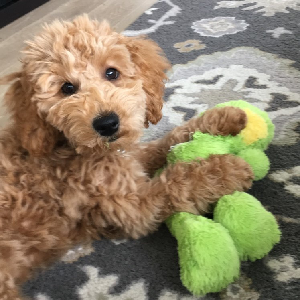

In [ ]:
ImageVector("melba_toy.JPG")

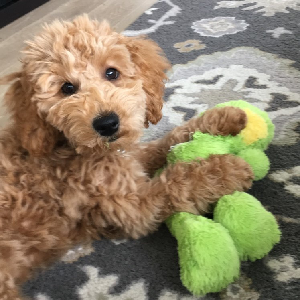

In [ ]:
# unchanged
ImageVector("melba_toy.JPG") + ImageVector.zero()

**EXERCISE:** 두 이미지(inside.JPG, outside.JPG)를 가중 평균하여 그 결과를 보여라. 어느 점이든 27만 차원이다. (가중치는 자유롭게 조정하되, 총 5개의 결과를 보여라)

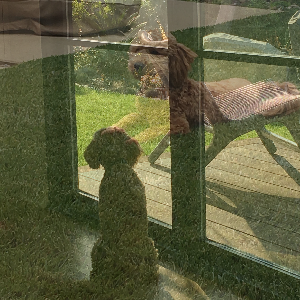

In [ ]:
?